In [10]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import numpy as np
import ta


In [11]:
df = pd.read_csv("./2330.TW_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[23:]
df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
stoch = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close'], window=14)
df['k'] = stoch.stoch()
df['d'] = stoch.stoch_signal()
df

,Open,High,Low,Close,Adj Close,Volume,rsi,k,d
Date,,,,,,,,,
2014-01-03,103.0,103.0,102.0,102.5,75.244667,38599000,NaN,NaN,NaN
2014-01-06,102.0,103.0,102.0,102.5,75.244667,23706000,NaN,NaN,NaN
2014-01-07,102.5,103.0,102.0,102.0,74.877609,15836000,NaN,NaN,NaN
2014-01-08,103.0,104.5,102.5,104.0,76.345802,30218000,NaN,NaN,NaN
2014-01-09,102.5,103.0,100.5,101.0,74.143509,63998000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-25,582.0,585.0,580.0,581.0,573.515503,9548143,56.714654,68.181818,63.636364
2023-12-26,583.0,586.0,582.0,586.0,578.451111,16094308,61.120473,90.909091,77.272727
2023-12-27,587.0,592.0,586.0,592.0,584.373840,33401336,65.640109,100.000000,86.363636


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


# 取出收盤價
closing_prices = df['Close'][-245:-5]
# 定義滑動窗口
window_size = 40
predictions = []

# 使用40天作為滑動窗口預測下一天的價格
for i in range(window_size, len(closing_prices)):
    pred_sub = []
    # 當前窗口的數據
    train_data = closing_prices[i - window_size:i]
    train_data = train_data.tolist() 
    for i in range(0,1):
        # 訓練ARIMA模型
        model = ARIMA(train_data, order=(1, 1, 0))  # 可以根據AIC選擇合適的ARIMA參數
        model_fit = model.fit()
            
        # 預測下一天的收盤價
        pred = model_fit.forecast(steps=1)
        train_data.append(pred[0])
        train_data.pop(0)
    predictions.append(pred[0])
print(predictions)


[516.8319259082035, 519.5996135167413, 523.1690142046517, 521.8585558653061, 521.7160200959191, 515.6034498503406, 515.1372568325032, 511.7335530557604, 510.7117655151356, 506.9406578739924, 513.2120029875259, 514.222749466687, 515.1311117338106, 527.011669117785, 536.2350180546351, 538.6517911607696, 535.072755204735, 526.4789270714917, 529.0264603042468, 533.882575343892, 533.4683906650678, 530.7319674882401, 530.7320675665602, 529.5648763430875, 525.3894605912673, 521.0687902427059, 512.3537508047624, 514.5152709881347, 519.0434733806401, 516.072244182751, 510.94628625524786, 512.3923684939359, 511.4119270242927, 507.86922977436063, 499.2251312519128, 491.74607938039054, 493.5160263760901, 502.38618551739387, 500.9691787406053, 495.7697206084165, 498.05493490764565, 500.07382711978033, 504.1793268488008, 510.43127218630497, 502.5835137514021, 498.6293910999921, 495.68532040704537, 495.4437604700239, 506.8130166654897, 523.9417713168774, 534.8450794840226, 532.8833694635595, 530.6141

In [15]:
len(predictions)

200

In [13]:
import json
with open('test_price1.json', 'r') as f:
    loaded_list = json.load(f)
len(loaded_list)

200

In [14]:
from sklearn.metrics import r2_score
mae =  np.mean( np.absolute(np.array(loaded_list) - np.array(predictions)))
mape = np.mean(np.absolute(np.array(loaded_list) - np.array(predictions).reshape(-1))/np.array(loaded_list))
# 新增：RMSE
rmse = np.sqrt(np.mean((np.array(loaded_list) - np.array(predictions).reshape(-1)) ** 2))
# 新增：R²
r2 = r2_score(loaded_list, predictions)
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"R²:   {r2:.4f}")

MAE:  7.7276
RMSE: 9.9011
MAPE: 1.4123%
R²:   0.8555


In [25]:
import csv

with open('./5day/output.csv', mode='r', newline='') as file:
    reader = csv.reader(file)
    rows = list(reader)

for i in range(len(predictions)):
    rows[i].append(predictions[i].item())

# 寫回檔案
with open('./5day/output.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

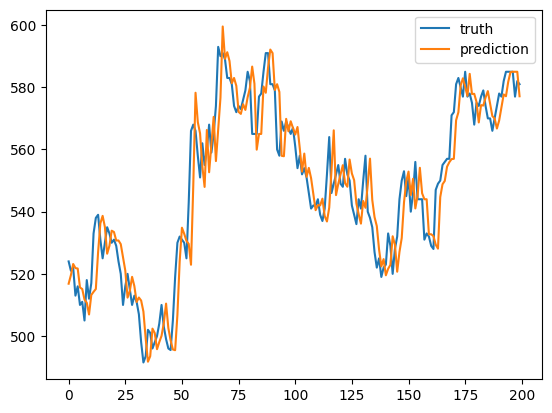

In [6]:
plt.plot(loaded_list)
plt.plot(predictions)
plt.legend(['truth', 'prediction'])

In [15]:
btdf = pd.DataFrame({'close':loaded_list, 'rsi':df['rsi'][-204:-4],'predicted_close':predictions})

In [16]:
btdf =btdf.dropna().reset_index(drop=True)

In [17]:
btdf

,close,rsi,predicted_close
0,523.999997,54.625193,516.831926
1,521.000006,52.838624,519.599614
2,522.000003,53.385902,523.169014
3,512.999996,47.988492,521.858556
4,515.999987,49.810034,521.716020
...,...,...,...
195,584.999985,63.775525,584.895404
196,584.999985,63.775525,585.000000
197,577.000010,53.269735,585.000000
198,581.999995,57.933878,585.000000


買入價格: 522.0000033378601
賣出價格: 512.9999959766865
cash: 982764.9859033525
額外要扣掉: 4299.587583767307
扣掉後的: 978465.3983195852
-------------------------------------
買入價格: 515.9999868571758
賣出價格: 510.0000050961971
cash: 967089.4329007696
額外要扣掉: 4223.049783840161
扣掉後的: 962866.3831169294
-------------------------------------
買入價格: 511.00000205636024
賣出價格: 511.99999901652336
cash: 964750.3773898768
額外要扣掉: 4193.979449807014
扣掉後的: 960556.3979400698
-------------------------------------
買入價格: 516.999983817339
賣出價格: 533.00000461936
cash: 990268.4365694228
額外要扣掉: 4265.328044030161
扣掉後的: 986003.1085253927
-------------------------------------
買入價格: 524.9999942183495
賣出價格: 534.9999985396862
cash: 1004783.1166408631
額外要扣掉: 4344.04504582321
扣掉後的: 1000439.0715950399
-------------------------------------
買入價格: 530.0000137388706
賣出價格: 529.0000167787075
cash: 998552.0773312121
額外要扣掉: 4346.390503216728
扣掉後的: 994205.6868279953
-------------------------------------
買入價格: 523.9999972581863
賣出價格: 520.000009417533

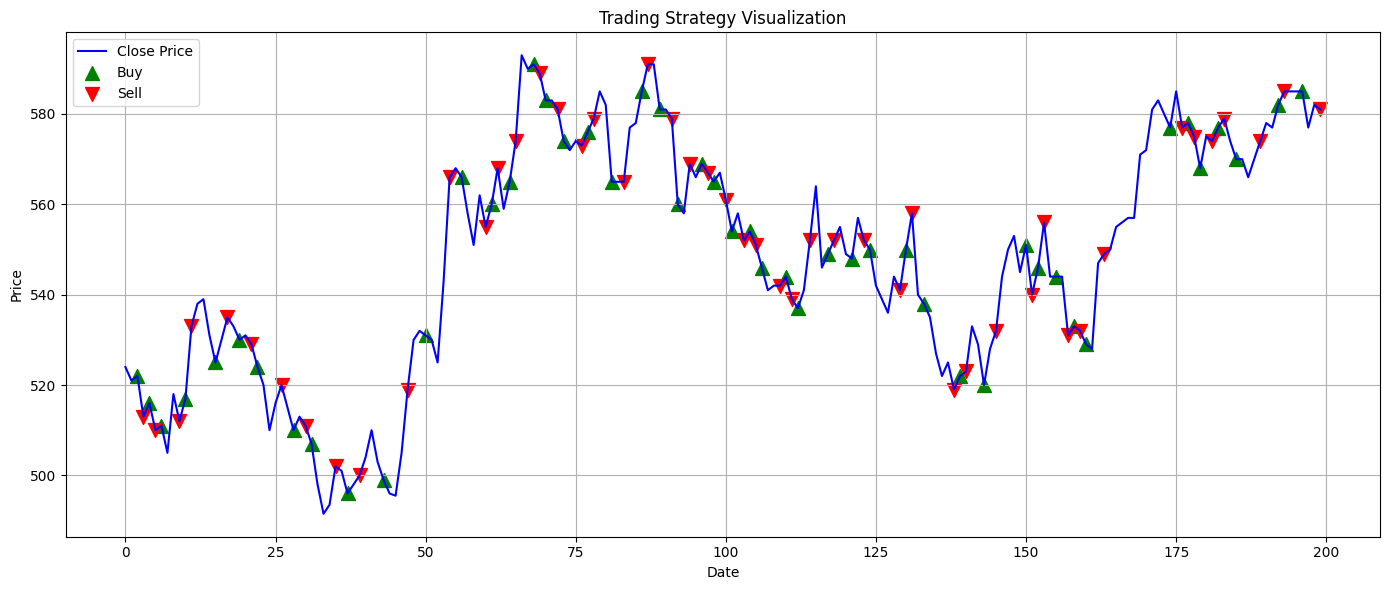

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化參數
initial_cash = 1000000
in_position = False
entry_price = 0
shares = 0
cash = initial_cash

# 儲存交易點資訊
buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []

# 手續費和稅率
fee_rate = 0.001425  # 手續費率 (1.425‰)
tax_rate = 0.0015     # 證券交易稅率 (1‰)
need_pay = 0 #需要付的手續費+稅金

# 模擬交易
for i in range(1, len(btdf)):
    if not in_position:
        need_pay = 0
        if btdf.loc[i, 'predicted_close'] > btdf.loc[i - 1, 'close']:
            entry_price = btdf.loc[i, 'close']
            shares = cash // entry_price
            need_pay += cash * fee_rate
            cash -= shares * entry_price
            in_position = True

            buy_dates.append(btdf.index[i])
            buy_prices.append(entry_price)

            print('買入價格:', entry_price)

    else:
        if btdf.loc[i, 'predicted_close'] < btdf.loc[i - 1, 'close']:
            exit_price = btdf.loc[i, 'close']
            cash += shares * exit_price
            need_pay += cash * (fee_rate + tax_rate)
            shares = 0
            in_position = False

            sell_dates.append(btdf.index[i])
            sell_prices.append(exit_price)

            print('賣出價格:', exit_price)
            print('cash:', cash)
            print('額外要扣掉:', need_pay)
            cash -= need_pay
            print('扣掉後的:', cash)
            print('-------------------------------------')

# 最後一天強制平倉
if in_position:
    final_price = btdf.loc[len(btdf) - 1, 'close']
    cash += shares * final_price
    sell_dates.append(btdf.index[-1])
    sell_prices.append(final_price)
    print('賣出價格:', final_price)

# 顯示最終資金
print('最終價格:', cash)

# 繪圖
plt.figure(figsize=(14, 6))
plt.plot(btdf.index, btdf['close'], label='Close Price', color='blue')

# 標記買進與賣出點
plt.scatter(buy_dates, buy_prices, color='green', label='Buy', marker='^', s=100)
plt.scatter(sell_dates, sell_prices, color='red', label='Sell', marker='v', s=100)

plt.title('Trading Strategy Visualization')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


買入價格: 522.0000033378601
賣出價格: 568.0000023841858
cash: 1088089.9981737137
額外要扣掉: 4607.6632446581125
扣掉後的: 1083482.3349290555
-------------------------------------
買入價格: 566.0000084638596
賣出價格: 580.9999975860119
最終價格: 1112192.314108855


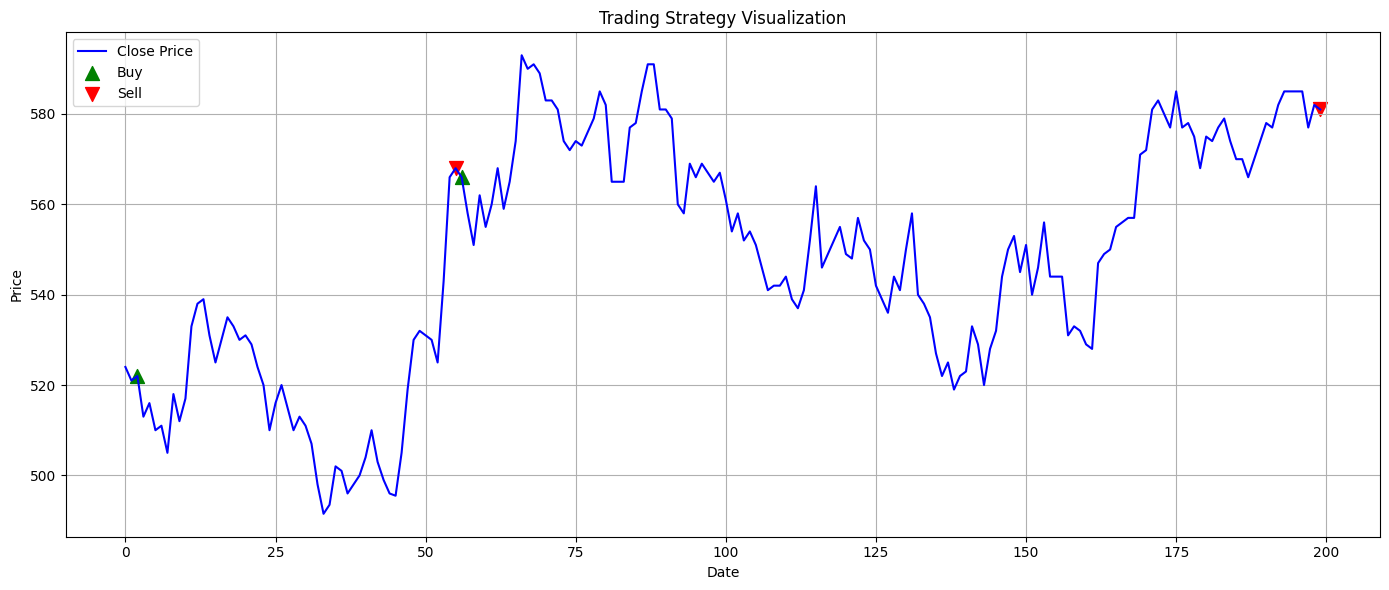

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 初始化參數
initial_cash = 1000000
in_position = False
entry_price = 0
shares = 0
cash = initial_cash

# 儲存交易點資訊
buy_dates = []
buy_prices = []
sell_dates = []
sell_prices = []

# 手續費和稅率
fee_rate = 0.001425  # 手續費率 (1.425‰)
tax_rate = 0.0015     # 證券交易稅率 (1‰)
need_pay = 0 #需要付的手續費+稅金

# 模擬交易
for i in range(1, len(btdf)):
    if not in_position:
        need_pay = 0
        if btdf.loc[i, 'predicted_close'] > btdf.loc[i - 1, 'close']:
            entry_price = btdf.loc[i, 'close']
            shares = cash // entry_price
            need_pay += cash * fee_rate
            cash -= shares * entry_price
            in_position = True

            buy_dates.append(btdf.index[i])
            buy_prices.append(entry_price)

            print('買入價格:', entry_price)

    else:
        if btdf.loc[i, 'rsi'] > 75.704 and btdf.loc[i, 'predicted_close'] < btdf.loc[i - 1, 'close']:
            exit_price = btdf.loc[i, 'close']
            cash += shares * exit_price
            need_pay += cash * (fee_rate + tax_rate)
            shares = 0
            in_position = False

            sell_dates.append(btdf.index[i])
            sell_prices.append(exit_price)

            print('賣出價格:', exit_price)
            print('cash:', cash)
            print('額外要扣掉:', need_pay)
            cash -= need_pay
            print('扣掉後的:', cash)
            print('-------------------------------------')

# 最後一天強制平倉
if in_position:
    final_price = btdf.loc[len(btdf) - 1, 'close']
    cash += shares * final_price
    sell_dates.append(btdf.index[-1])
    sell_prices.append(final_price)
    print('賣出價格:', final_price)

# 顯示最終資金
print('最終價格:', cash)

# 繪圖
plt.figure(figsize=(14, 6))
plt.plot(btdf.index, btdf['close'], label='Close Price', color='blue')

# 標記買進與賣出點
plt.scatter(buy_dates, buy_prices, color='green', label='Buy', marker='^', s=100)
plt.scatter(sell_dates, sell_prices, color='red', label='Sell', marker='v', s=100)

plt.title('Trading Strategy Visualization')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


# 取出收盤價
closing_prices = df['Close'][-245:-5]
# 定義滑動窗口
window_size = 40
predictions = []

# 使用40天作為滑動窗口預測下一天的價格
for i in range(window_size, len(closing_prices)):
    pred_sub = []
    # 當前窗口的數據
    train_data = closing_prices[i - window_size:i]
    train_data = train_data.tolist() 
    for i in range(0,5):
        # 訓練ARIMA模型
        model = ARIMA(train_data, order=(1, 1, 0))  # 可以根據AIC選擇合適的ARIMA參數
        model_fit = model.fit()
            
        # 預測下一天的收盤價
        pred = model_fit.forecast(steps=1)
        pred_sub.append(pred[0])
        train_data.append(pred[0])
        train_data.pop(0)
    predictions.append(pred_sub)
print(predictions)

[[516.8319259082035, 516.6010711364347, 516.6654879971269, 516.6470044804273, 516.6522653053036], [519.5996135167413, 519.9940050896647, 519.8798288561269, 519.9126205990285, 519.9030842284325], [523.1690142046517, 523.4057011455886, 523.3388308569527, 523.3579633426929, 523.3525369026689], [521.8585558653061, 521.6148196830236, 521.6848881913983, 521.6649189101277, 521.6705713726351], [521.7160200959191, 521.7976830731088, 521.7744020920478, 521.7809940824228, 521.779126033447], [515.6034498503406, 514.8566754090825, 515.0694826189642, 515.0087902511901, 515.0281575141443], [515.1372568325032, 515.3837622036763, 515.3132731576791, 515.335824731967, 515.3279298014288], [511.7335530557604, 511.23228513574804, 511.39429395796014, 511.33708834879457, 511.3572044924387], [510.7117655151356, 510.80463040103103, 510.7719332315654, 510.78339804486524, 510.77938279267863], [506.9406578739924, 506.2553897665296, 506.4963766520113, 506.41173000179924, 506.44334281753675], [513.2120029875259, 514

In [9]:
len(predictions)

200

In [10]:
import json
with open('test_price.json', 'r') as f:
    loaded_list = json.load(f)
len(loaded_list)

200

In [12]:
mae =  np.mean( np.absolute(np.array(loaded_list) - np.array(predictions)))
mape = np.mean(np.absolute(np.array(loaded_list) - np.array(predictions))/np.array(loaded_list))
# 新增：RMSE
rmse = np.sqrt(np.mean((np.array(loaded_list) - np.array(predictions)) ** 2))
# 新增：R²
r2 = r2_score(loaded_list, predictions)
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4%}")
print(f"R²:   {r2:.4f}")

MAE:  10.5717
RMSE: 13.5400
MAPE: 1.9245%
R²:   0.7345
